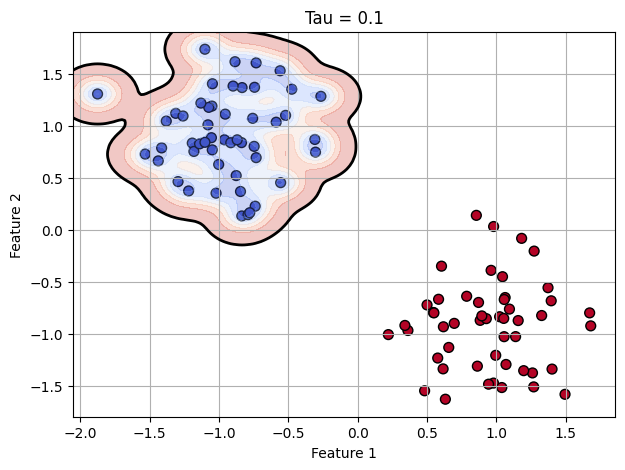

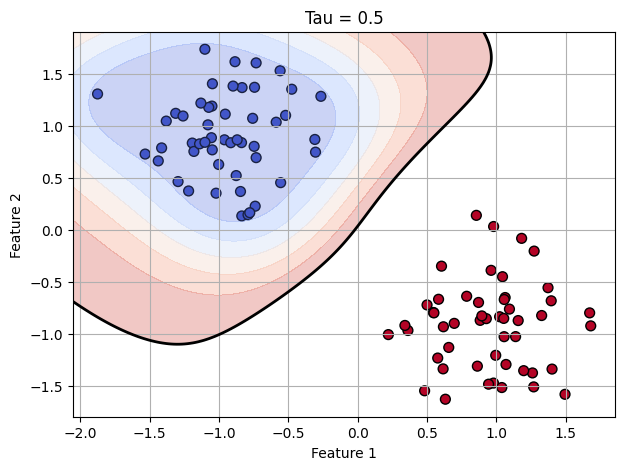

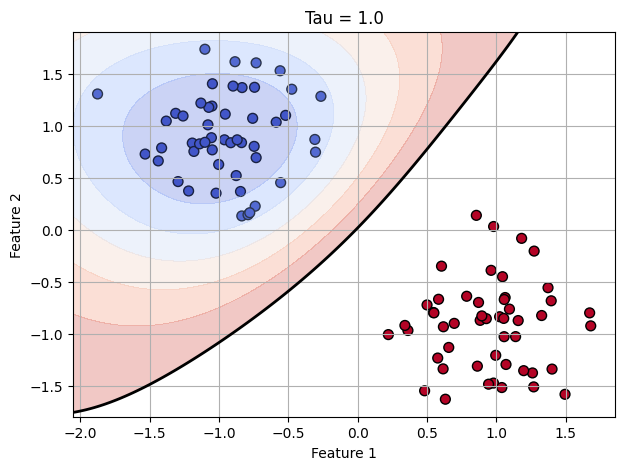

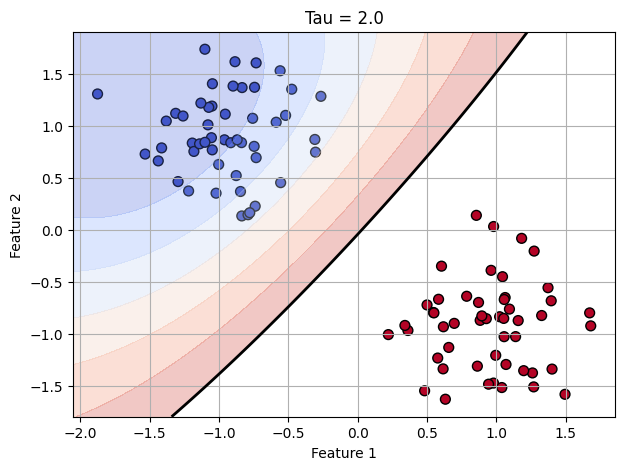

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)
y = 2 * y - 1  # Convert to {-1, 1}
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define a range of tau values
tau_values = [0.1, 0.5, 1.0, 2.0]

# Plot the decision boundaries for different tau values
for tau in tau_values:
    gamma = 1 / (2 * tau**2)
    clf = SVC(kernel='rbf', gamma=gamma)
    clf.fit(X, y)
    
    # Create a new figure for each tau value
    plt.figure(figsize=(7, 5))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolors='k')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 200),
                         np.linspace(ylim[0], ylim[1], 200))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap='coolwarm', alpha=0.3)
    ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')
    
    plt.title(f'Tau = {tau}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    
    # Save each plot separately
    plt.savefig(f'svm_gaussian_kernel_tau_{tau}.png')
    plt.show()
